# Linear Models


In [1]:
print(matplotlib.__version__)

NameError: name 'matplotlib' is not defined

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
#Nuestras librerias
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate


In [4]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [5]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

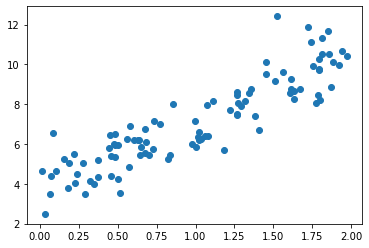

In [6]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [7]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [8]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [9]:
#X_fit[]

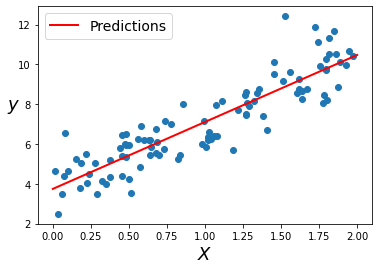

In [10]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [11]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [12]:
X_new.shape

(2, 1)

In [13]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [14]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [15]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [16]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

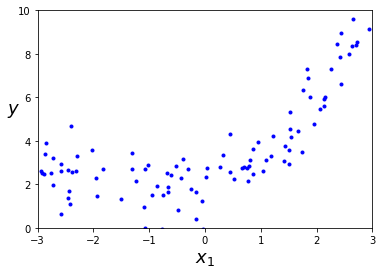

In [17]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [18]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [20]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [21]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [22]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [23]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

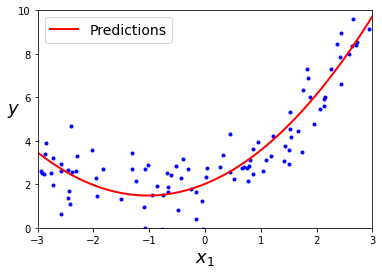

In [24]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [59]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
887,6.022948,37.286697
170,3.182915,45.496473
63,2.479723,59.129649
179,3.224625,41.447674
424,4.214040,33.951714
922,6.385253,30.902568
377,4.085876,44.449300
614,4.868221,40.618870
441,4.251257,40.071950
530,4.537264,35.512017


In [60]:
X = df[['Number of Units']].values
y = df['Manufacturing Cost'].values
df = df.sort_values('Number of Units')

In [61]:
len(X)

1000

In [62]:
X

array([[ 1.        ],
       [ 1.18599365],
       [ 1.19149864],
       [ 1.2047714 ],
       [ 1.29877282],
       [ 1.30743503],
       [ 1.3393857 ],
       [ 1.3790436 ],
       [ 1.41999951],
       [ 1.47394834],
       [ 1.54089845],
       [ 1.57459986],
       [ 1.62030979],
       [ 1.63199723],
       [ 1.65268704],
       [ 1.69580103],
       [ 1.70421427],
       [ 1.73920139],
       [ 1.76014627],
       [ 1.76700188],
       [ 1.77728035],
       [ 1.7843415 ],
       [ 1.80208917],
       [ 1.81591741],
       [ 1.82328911],
       [ 1.83109722],
       [ 1.83240661],
       [ 1.84287574],
       [ 1.84584064],
       [ 1.86522775],
       [ 1.87414418],
       [ 1.89573077],
       [ 1.9430286 ],
       [ 1.9877704 ],
       [ 1.99190237],
       [ 2.00480379],
       [ 2.05231674],
       [ 2.06492056],
       [ 2.07583577],
       [ 2.1052735 ],
       [ 2.11329869],
       [ 2.11858955],
       [ 2.14190876],
       [ 2.15159002],
       [ 2.17131692],
       [ 2

In [63]:
y

array([ 95.06605578,  96.53174997,  73.66131056,  95.5668425 ,
        98.77701266, 100.        ,  94.75975637,  67.18538349,
        72.88604061,  61.96769605,  69.28409692,  64.55249643,
        77.67937742,  58.42664546,  51.4409698 ,  60.92903611,
        81.86775617,  60.5725967 ,  74.12260141,  71.61417311,
        77.98340868,  57.68193975,  52.96440828,  69.1787313 ,
        70.42005203,  36.08580039,  81.49469151,  59.64067983,
        63.40954945,  55.03613926,  58.06045968,  52.11412489,
        61.27727337,  62.5960052 ,  61.23299391,  60.02154297,
        47.88555562,  54.90274827,  54.17817589,  60.21890139,
        44.71285113,  45.64983585,  57.80822022,  52.02926301,
        54.10994815,  73.77810164,  56.54285158,  61.09323474,
        68.02951817,  47.32132667,  48.76154994,  75.52197014,
        63.99907453,  51.41362716,  65.26837002,  54.02985162,
        60.70732964,  42.13535314,  40.54420656,  66.71268413,
        57.82831989,  84.1944303 ,  52.05941671,  59.12

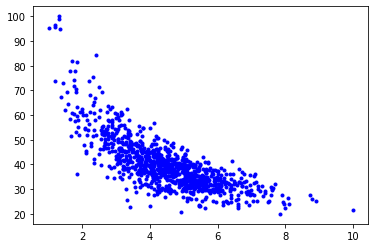

In [64]:
plt.plot(X,y,'b.')

In [112]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']
mae_list =[] 
r2_list =[] 

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


In [114]:
X_train

,Number of Units
992,7.974248
31,1.895731
247,3.576501
806,5.561688
189,3.278806
...,...
575,4.688092
838,5.692784
337,3.940463
523,4.524484


In [115]:
y_train

992    24.000024
31     52.114125
247    44.850521
806    34.197503
189    30.119867
         ...    
575    48.512880
838    31.132853
337    28.023576
523    38.219681
863    31.549470
Name: Manufacturing Cost, Length: 900, dtype: float64

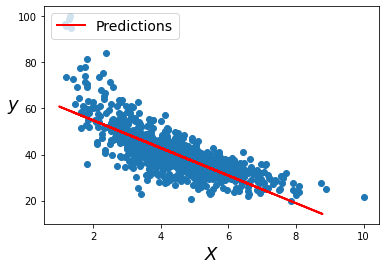

In [116]:
#lineal
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

X_fit = X_test
y_fit = linear_reg.predict(X_fit)

plt.scatter(X_train, y_train)
plt.plot(X_fit.values, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [117]:
#**********************************************************************************************************************************************************************************************
#la ecuacion
linear_reg.coef_, linear_reg.intercept_


mae_regresion_lineal_simple = metrics.mean_absolute_error(y_test,y_fit)
mae_list.append(mae_regresion_lineal_simple) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_regresion_lineal_simple = r2_score(y_test,y_fit)
r2_list.append(r2_regresion_lineal_simple)

print('(MAE):', metrics.mean_absolute_error(y_test,y_fit))
print('(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_fit)))

print('r2_score:', r2_score(y_test,y_fit))
print('El modelo es: Y =', linear_reg.coef_,'X +', linear_reg.intercept_)


(MAE): 5.013587781954963
(RMSE): 7.108963321847681
r2_score: 0.6116251549562579
El modelo es: Y = [-5.98882699] X + 66.8365074122699


$y = -5.98882699x + 66.8365074122699$

In [118]:
#polinomial

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [119]:
print("Input",poly_features.n_input_features_)
print("Ouput",poly_features.n_output_features_)
print("Powersn",poly_features.powers_)

Input 1
Ouput 2
Powersn [[1]
 [2]]


C:\Users\testr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


In [120]:
X_poly.shape

(900, 2)

In [121]:
from sklearn.pipeline import make_pipeline

lin_reg_poly = LinearRegression(fit_intercept=True)
lin_reg_poly.fit(X_poly, y_train)
lin_reg_poly.coef_, lin_reg.intercept_


(array([-16.40638102,   1.13136095]), array([2.01873554]))

In [122]:
X_new=X_test
X_new_poly = poly_features.fit_transform(X_new)
y_new_poly = lin_reg_poly.predict(X_new_poly)


In [123]:
order = np.argsort(X_test.values.ravel()) #Sacamos el ordende los datos

sorted_X_Poly = X_test.values.ravel()[order] #Ordenamos los en un orden ordenado
sorted_Y_Poly = y_test.values.ravel()[order]
sorted_predic_Poly = y_new_poly[order]

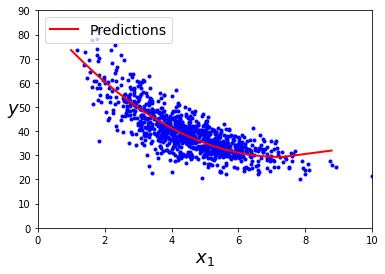

In [124]:

plt.plot(X.values, y, "b.")
plt.plot(sorted_X_Poly, sorted_predic_Poly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 90]);

In [125]:
#**********************************************************************************************************************************************************************************************


mae_LR_poly = metrics.mean_absolute_error(y_test,y_new_poly)
mae_list.append(mae_LR_poly) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_LR_poly = r2_score(y_test,y_new_poly)
r2_list.append(r2_LR_poly)

val_mae = metrics.mean_absolute_error(y_test, y_new_poly)
#mae_list.append(mae) esto no, eso es del compa;ero que nos los paso, no sean copiones
r2Score = r2_score(y_test, y_new_poly)
#r2_list.append(r2Score) esto tampoco, es del metodo avanzado del compa;ero
print('Error medio Absoluto (MAE):', val_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_new_poly)))
print('r2_score',r2Score)

print('El modelo es: Y =', lin_reg_poly.coef_[1],'X^2 +', lin_reg_poly.coef_[0],'X +',lin_reg_poly.intercept_)

Error medio Absoluto (MAE): 4.383302575968108
Root Mean Squared Error: 5.832771301068423
r2_score 0.7385501224942537
El modelo es: Y = 1.1313609537119216 X^2 + -16.40638101721239 X + 88.80179909112496


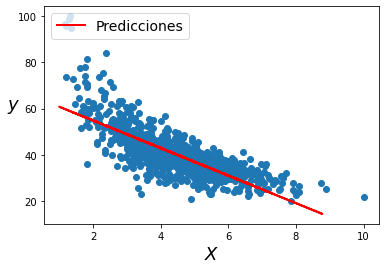

In [126]:
#**********************************************************************************************************************************************************************************************
LR_ridge = Ridge(alpha=5.0,fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
LR_ridge.fit(X_train, y_train)
X_Ridge = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
Y_Ridge = LR_ridge.predict(X_Ridge)
plt.scatter(X_train, y_train)
plt.plot(X_Ridge.values, Y_Ridge, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [127]:
#metricas del ridge

mae_ridge = metrics.mean_absolute_error(y_test,Y_Ridge)
mae_list.append(mae_ridge) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_ridge= r2_score(y_test,Y_Ridge)
r2_list.append(r2_ridge)

val_mae_ridge = metrics.mean_absolute_error(y_test, Y_Ridge)
r2Score = r2_score(y_test, Y_Ridge)
print('Error medio Absoluto (MAE):', val_mae_ridge)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_Ridge)))
print('r2_score',r2Score)


print('El modelo es: Y =', LR_ridge.coef_,'X +', LR_ridge.intercept_)


Error medio Absoluto (MAE): 5.016205738992834
Root Mean Squared Error: 7.111111949820097
r2_score 0.6113903530239646
El modelo es: Y = [-5.97003397] X + 66.75243237759665


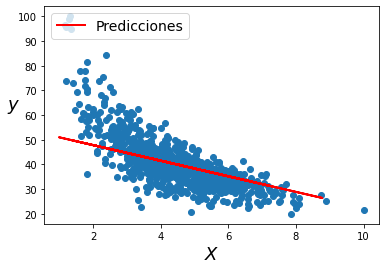

In [128]:
LR_lasso = Lasso(alpha=5.0,fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
LR_lasso.fit(X_train, y_train)
X_Lasso = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
Y_lasso = LR_lasso.predict(X_Lasso)
plt.scatter(X_train, y_train)
plt.plot(X_Lasso.values, Y_lasso, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);


#El lasso castiga mas a las coeficientes de las variables, en comparacion con el ridge

In [129]:
#Las metricas del lasso

mae_lasso = metrics.mean_absolute_error(y_test,Y_lasso)
mae_list.append(mae_lasso) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_lasso= r2_score(y_test,Y_lasso)
r2_list.append(r2_lasso)


val_mae_lasso = metrics.mean_absolute_error(y_test, Y_lasso)
r2Score = r2_score(y_test, Y_lasso)
print('Error medio Absoluto (MAE):', val_mae_lasso)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_lasso)))
print('r2_score',r2Score)

#La ecuacion

print('El modelo es: Y =', LR_lasso.coef_,'X +', LR_lasso.intercept_)


Error medio Absoluto (MAE): 5.681207654677401
Root Mean Squared Error: 8.409660991642687
r2_score 0.456505036516648
El modelo es: Y = [-3.15572458] X + 54.16195119377412


In [130]:
print(mae_list)
print(r2_list)

[5.013587781954963, 4.383302575968108, 5.016205738992834, 5.681207654677401]
[0.6116251549562579, 0.7385501224942537, 0.6113903530239646, 0.456505036516648]


In [134]:
nm=list(['LR','RLP','Ridge','Lasso'])
nm

['LR', 'RLP', 'Ridge', 'Lasso']

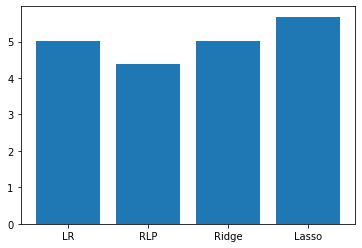

In [135]:

plt.bar(nm, mae_list)
plt.show()


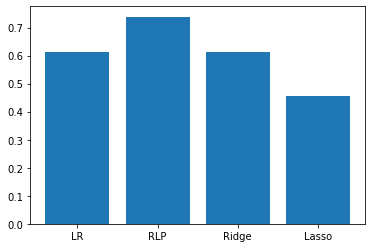

In [136]:

plt.bar(nm, r2_list)
plt.show()

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [137]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19178,1924069115,20150224T000000,873000.0,3,2.25,2720,54450,2.0,0,0,...,11,2720,0,1997,0,98027,47.5473,-122.092,3170,60548
18904,2202500025,20140721T000000,550000.0,4,1.00,2420,15520,2.0,0,0,...,7,2420,0,1945,0,98006,47.5744,-122.137,1630,9965
11987,3374500240,20141217T000000,365000.0,3,2.50,2470,7700,2.0,0,0,...,8,2470,0,1990,0,98031,47.4096,-122.170,2400,7700
14581,6929602721,20150408T000000,95000.0,2,1.00,960,7000,1.0,0,0,...,4,960,0,1918,0,98198,47.3864,-122.307,1850,8120
7990,4039701280,20150408T000000,954500.0,3,2.25,2440,9689,1.0,0,2,...,8,1830,610,1974,0,98008,47.6141,-122.111,2730,9689
5382,8731980680,20150112T000000,329000.0,3,2.75,1920,7700,1.0,0,0,...,8,1320,600,1978,0,98023,47.3213,-122.378,2040,8000
18073,7805450040,20150316T000000,915557.0,5,3.25,3740,11536,2.0,0,0,...,9,2540,1200,1984,0,98006,47.5599,-122.108,2920,11258
7264,303100080,20140528T000000,245100.0,3,1.75,1300,7958,1.0,0,0,...,7,1300,0,1996,0,98092,47.3162,-122.194,1640,8698
10859,3505100126,20140626T000000,1250000.0,3,3.00,3760,8500,2.5,0,3,...,10,3060,700,1910,0,98116,47.5815,-122.398,2610,5500
7449,6706200130,20150415T000000,343000.0,3,1.75,2210,7920,1.0,0,0,...,7,1400,810,1966,0,98178,47.4968,-122.237,2220,7920


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [139]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [140]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


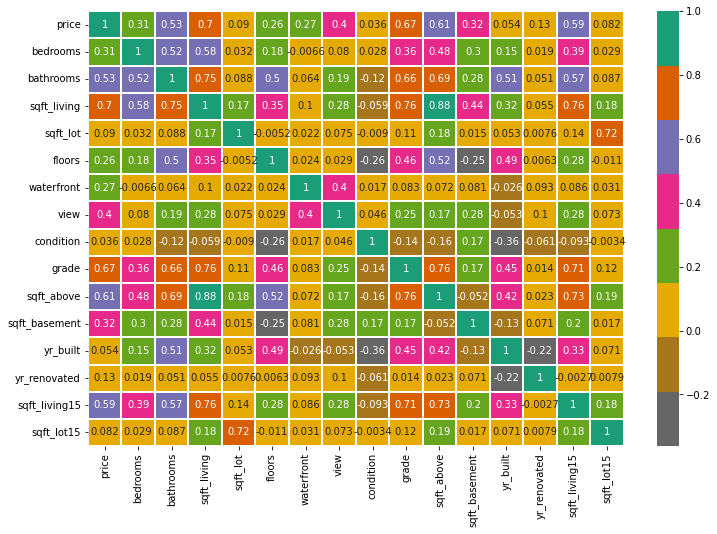

In [141]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [155]:
df.corr().sort_values('price').reset_index()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
1,yr_built,0.054012,0.154178,0.506019,0.318049,0.053080,0.489319,-0.026161,-0.053440,-0.361417,0.446963,0.423898,-0.133124,1.000000,-0.224874,0.326229,0.070958
2,sqft_lot15,0.082447,0.029244,0.087175,0.183286,0.718557,-0.011269,0.030703,0.072575,-0.003406,0.119248,0.194050,0.017276,0.070958,0.007854,0.183192,1.000000
3,sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
4,yr_renovated,0.126434,0.018841,0.050739,0.055363,0.007644,0.006338,0.092885,0.103917,-0.060618,0.014414,0.023285,0.071323,-0.224874,1.000000,-0.002673,0.007854
5,floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
6,waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
7,bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
8,sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.200355,0.017276
9,view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575


In [158]:
df_list = df.corr().sort_values('price').reset_index()
df_list = df_list.iloc[0,-4:-1].reset_index()

In [160]:
df_list = df_list['index']
df_list = df_list.to_list()
df_list

['yr_built', 'yr_renovated', 'sqft_living15']

In [142]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [165]:
mae_m_list =[] 
r2_m_list =[] 

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [164]:
#tu codigo aquí

mult_linear_reg = LinearRegression(fit_intercept=True)
mult_linear_reg.fit(X_train, y_train)

X_fit = X_test
y_fit = mult_linear_reg.predict(X_fit)


In [166]:
#**********************************************************************************************************************************************************************************************
#la ecuacion
mult_linear_reg.coef_, mult_linear_reg.intercept_


mae_regresion_lineal_mult = metrics.mean_absolute_error(y_test,y_fit)
mae_m_list.append(mae_regresion_lineal_mult) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_regresion_lineal_mult = r2_score(y_test,y_fit)
r2_m_list.append(r2_regresion_lineal_mult)

print('(MAE):', metrics.mean_absolute_error(y_test,y_fit))
print('(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_fit)))

print('r2_score:', r2_score(y_test,y_fit))
print('El modelo es: Y =', mult_linear_reg.coef_,'X +', mult_linear_reg.intercept_)


(MAE): 137480.13882736175
(RMSE): 232133.36762405944
r2_score: 0.6579723205008269
El modelo es: Y = [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750272e+01  6.02175567e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]] X + [6151359.26274063]


In [146]:
#**********************************************************************************************************************************************************************************************


mae_LR_poly = metrics.mean_absolute_error(y_test,y_new_poly)
mae_list.append(mae_LR_poly) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_LR_poly = r2_score(y_test,y_new_poly)
r2_list.append(r2_LR_poly)

val_mae = metrics.mean_absolute_error(y_test, y_new_poly)
#mae_list.append(mae) esto no, eso es del compa;ero que nos los paso, no sean copiones
r2Score = r2_score(y_test, y_new_poly)
#r2_list.append(r2Score) esto tampoco, es del metodo avanzado del compa;ero
print('Error medio Absoluto (MAE):', val_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_new_poly)))
print('r2_score',r2Score)

print('El modelo es: Y =', lin_reg_poly.coef_[1],'X^2 +', lin_reg_poly.coef_[0],'X +',lin_reg_poly.intercept_)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
7712,5,2.75,3750,12077,2.0,0,4,3,10,3750,0,2005,0,3120,7255
7545,4,4.50,5250,48352,2.0,0,0,3,10,5250,0,1998,0,2500,48352
4158,3,2.50,2880,10126,2.0,0,0,4,10,2880,0,1985,0,2960,10514
17476,5,1.75,3250,13702,1.0,0,2,3,8,1650,1600,1965,0,2620,11328
20791,4,2.75,3090,5859,2.0,0,0,3,9,3090,0,2010,0,2960,5250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,3,2.25,1920,9672,2.0,0,0,4,8,1920,0,1984,0,1950,10125
8006,3,1.00,1240,3600,1.5,0,0,3,7,1240,0,1902,0,1680,3600
17745,3,2.25,1780,7332,2.0,0,0,3,7,1780,0,1987,0,1510,7625
17931,2,1.00,1150,5000,1.0,0,0,4,7,1050,100,1924,0,1463,4320


In [167]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
print("Input",poly_features.n_input_features_)
print("Ouput",poly_features.n_output_features_)
print("Powersn",poly_features.powers_)

Input 15
Ouput 135
Powersn [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 2]]


C:\Users\testr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


In [168]:
X_new=X_test
X_new_poly = poly_features.fit_transform(X_new)
y_new_poly = lin_reg_poly.predict(X_new_poly)

ValueError: X has 135 features, but LinearRegression is expecting 2 features as input.